<a href="https://colab.research.google.com/github/ranasweta/Drone_Project/blob/main/A_Star_Algorithm_ISDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries (optional if already installed)
!pip install requests


In [ ]:
# Step 3: Define API details
API_KEY = "MiIoLqxDVN56toRpsz8k"  # Replace with your Roboflow API key
WORKSPACE_NAME = "nice-9c4n4"  # Replace with your workspace name
PROJECT_NAME = "object-detection-isdc"  # Replace with your project name
VERSION = 1  # Dataset version (update if necessary)


In [ ]:
# Step 4: Construct the API URL
url = f"https://api.roboflow.com/{WORKSPACE_NAME}/{PROJECT_NAME}/{VERSION}/download"

# Step 4.1: Make a request to the API
import requests

response = requests.get(
    url,
    headers={"Authorization": f"Bearer {API_KEY}"}
)

# Step 4.2: Save the dataset if the request is successful
if response.status_code == 200:
    output_file = "dataset.zip"
    with open(output_file, "wb") as file:
        file.write(response.content)
    print(f"Dataset downloaded successfully and saved as {output_file}")
else:
    print(f"Failed to download dataset. Status Code: {response.status_code}")
    print(response.json())


Failed to download dataset. Status Code: 404
{'error': {'message': 'Unsupported get request. Version with ID "object-detection-isdc/1" does not exist or cannot be loaded due to missing permissions.', 'status': 404, 'type': 'GraphMethodException', 'hint': 'You can find the API docs at https://docs.roboflow.com'}}


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RkO2Mqw52YCG9gwRItwr")
project = rf.workspace("pits-qs1vn").project("pits-2")
version = project.version(4)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pits-2-4 in yolov5pytorch:: 100%|██████████| 1444/1444 [00:00<00:00, 3335.36it/s]


In [ ]:
predictions_data= model.predict("/topview.jpg", confidence=30, overlap=30).json()

In [ ]:
print(predictions_data)

{'predictions': [{'x': 9.5, 'y': 85.0, 'width': 19.0, 'height': 14.0, 'confidence': 0.7198148965835571, 'class': 'Cones', 'class_id': 0, 'detection_id': 'eaec97a0-7a5f-45c4-b1cf-c7c8bc660036', 'image_path': '/topview.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 156.5, 'y': 104.0, 'width': 25.0, 'height': 16.0, 'confidence': 0.5675296783447266, 'class': 'Cones', 'class_id': 0, 'detection_id': 'b2eede6a-6300-4a7f-9a54-61001a5576b1', 'image_path': '/topview.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 126.5, 'y': 163.5, 'width': 35.0, 'height': 9.0, 'confidence': 0.5403989553451538, 'class': 'Cones', 'class_id': 0, 'detection_id': 'f78fd0a3-b073-4e59-a3a7-e209e19b6e91', 'image_path': '/topview.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 212.0, 'y': 9.0, 'width': 28.0, 'height': 18.0, 'confidence': 0.3754699230194092, 'class': 'Cones', 'class_id': 0, 'detection_id': 'ceac146f-65d9-4386-8dbe-3d7e40ddfc57', 'image_path': '/topview.jpg', 'prediction_type': 'O

In [ ]:
model.predict("/topview.jpg", confidence=20, overlap=30).save("prediction.jpg")


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import json
import os
import cv2
from queue import PriorityQueue

In [ ]:
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

In [ ]:
def astar_direct(grid, start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))

    came_from = {}
    cost_so_far = {start: 0}

    while not open_set.empty():
        current = open_set.get()[1]

        if current == goal:
            break

        for i in range(-1, 2):
            for j in range(-1, 2):
                neighbor = (current[0] + i, current[1] + j)
                if (
                    0 <= neighbor[0] < grid.shape[0]
                    and 0 <= neighbor[1] < grid.shape[1]
                    and grid[neighbor] == 0
                ):
                    new_cost = cost_so_far[current] + (1 if i == 0 or j == 0 else np.sqrt(2))
                    if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                        cost_so_far[neighbor] = new_cost
                        priority = new_cost + heuristic(neighbor, goal)
                        open_set.put((priority, neighbor))
                        came_from[neighbor] = current

    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()

    return path



In [ ]:
def astar_direct_path(grid, start, waypoints):
    path = []
    current_start = start

    for waypoint in waypoints:
        segment_path = astar_direct(grid, current_start, waypoint)
        path.extend(segment_path[:-1])  # Avoid duplicate points
        current_start = waypoint
        print(type(waypoint))

    final_path = astar_direct(grid, current_start, waypoints[-1])
    path.extend(final_path)  # Include all points of the final path

    return path

In [ ]:

obstacle_list = []
waypoint_list = []

# Iterate through predictions and append to the corresponding list
for prediction in predictions_data['predictions']:
    if prediction['class'].lower() == 'obstacles':
        obstacle_list.append(prediction)
    elif prediction['class'].lower() == 'cones':
        waypoint_list.append(prediction)

# Display the results
print("Obstacle List:")
print(obstacle_list)

print("\nWaypoint List:")
print(waypoint_list)


Obstacle List:
[]

Waypoint List:
[{'x': 9.5, 'y': 85.0, 'width': 19.0, 'height': 14.0, 'confidence': 0.7198148965835571, 'class': 'Cones', 'class_id': 0, 'detection_id': '4b3b1613-4a2b-4041-8214-9177293dfda0', 'image_path': '/topview.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 156.5, 'y': 104.0, 'width': 25.0, 'height': 16.0, 'confidence': 0.5675296783447266, 'class': 'Cones', 'class_id': 0, 'detection_id': '0373bd15-69f5-469a-90b3-6f7960cfdd24', 'image_path': '/topview.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 126.5, 'y': 163.5, 'width': 35.0, 'height': 9.0, 'confidence': 0.5403989553451538, 'class': 'Cones', 'class_id': 0, 'detection_id': '098c7da0-6c2a-4f77-a0ca-fe415d9fc0f1', 'image_path': '/topview.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 212.0, 'y': 9.0, 'width': 28.0, 'height': 18.0, 'confidence': 0.3754699230194092, 'class': 'Cones', 'class_id': 0, 'detection_id': '8d157d02-f233-4a63-bbdf-00f26c7422db', 'image_path': '/topview.jpg', 'pr

In [ ]:
example_image_path= "/topview.jpg"

[(9.5, 85.0), (156.5, 104.0), (126.5, 163.5), (212.0, 9.0)]
<class 'list'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


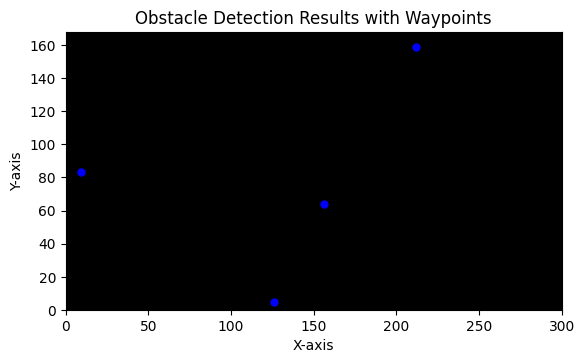

In [ ]:
example_image = cv2.imread(example_image_path)
image_height, image_width, _ = example_image.shape

# Choose grid size based on image dimensions
grid_size = (image_height, image_width)

# Create an empty image (grid)
image = np.zeros(grid_size)

# Plot obstacles on the grid
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')


for prediction in obstacle_list:
  x, y, width, height = (
    prediction["x"],
    image_height - prediction["y"],  # Invert y-coordinate
    prediction["width"],
    prediction["height"],
    )

            # Calculate half-width and half-height
  half_width = width / 2
  half_height = height / 2

            # Calculate vertices of the bounding box
  x1, y1 = x - half_width, y - half_height
  x2, y2 = x + half_width, y - half_height
  x3, y3 = x + half_width, y + half_height
  x4, y4 = x - half_width, y + half_height

  print((x1,y1),(x2,y2),(x3,y3),(x4,y4))

            # Draw a rectangle for each detected obstacle
  rect = patches.Polygon(
        [(x1, y1), (x2, y2), (x3, y3), (x4, y4)],
        linewidth=0.5, edgecolor="red", facecolor="white"
        )
  ax.add_patch(rect)

        # Access the imported data for waypoints


        # Plot waypoints on the same image
waypoints_x = [int(float(waypoint["x"])) for waypoint in waypoint_list]
waypoints_y = [(image_height-float(waypoint["y"])) for waypoint in waypoint_list]  # Do not invert y-coordinate
waypts=[((((waypoint["x"])), ((waypoint["y"])))) for waypoint in waypoint_list]
print(waypts)
print(type(waypts))
for i in waypts:
  print(type(i))
#waypoints_x.append(1000)
#waypoints_y.append(1500)

ax.plot(waypoints_x, waypoints_y, marker='o', markersize=5, color='blue', linestyle='None')

        # Update plot limits based on the chosen grid size
ax.set_xlim(0, image_width)
ax.set_ylim(0, image_height)

plt.title("Obstacle Detection Results with Waypoints")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [ ]:
import numpy as np

def create_occupancy_grid_from_predictions(grid_size, predictions):
    grid = np.zeros(grid_size)

    obstacle_centers = []
    for obstacle in predictions:
      ( x, y, width, height) = (obstacle['x'], obstacle['y'], obstacle['width'], obstacle['height'])

      # Calculate obstacle center
      half_width = width / 2
      half_height = height / 2

            # Calculate vertices of the bounding box
      x1, y1 = x - half_width, y - half_height
      x2, y2 = x + half_width, y - half_height
      x3, y3 = x + half_width, y + half_height
      x4, y4 = x - half_width, y + half_height

      print(x1,x2,y1,y2)
        # Mark cells within the obstacle boundaries as occupied
      for i in range(int(max(0,x1)), int(min(grid_size[0],x2))):
          for j in range(int(max(0,y1)),int( min(grid_size[1],y3))):
            grid[i, j] = 1  # Mark cell as occupied

      print(grid)

      # rect = patches.Polygon(
      #   [(x1, y1), (x2, y2), (x3, y3), (x4, y4)],
      #   linewidth=0.5, edgecolor="red", facecolor="white"
      #   )
      # ax.add_patch(rect)

    return grid, obstacle_centers

In [ ]:
def plot_occupancy_grid_with_path_and_waypoints(occupancy_grid, start, destination, path, waypoints):
    plt.imshow(occupancy_grid, cmap='gray', origin='lower')
    plt.scatter(start[1], start[0], color='green', marker='o', label='Start')
    plt.scatter(destination[1], destination[0], color='red', marker='o', label='Destination')
    plt.scatter([p[1] for p in waypoints], [p[0] for p in waypoints], color='blue', marker='*', label='Waypoints')
    for i in range(len(path) - 1):
      plt.arrow(path[i][1], path[i][0], path[i + 1][1] - path[i][1], path[i + 1][0] - path[i][0],
              head_width=0.2, head_length=0.2, fc='orange', ec='orange')
    plt.legend()
    plt.title('Occupancy Grid Map with Path and Waypoints (Diagonal Movement Allowed)')
    plt.xlabel('Y-axis')
    plt.ylabel('X-axis')
    plt.show()

In [ ]:
print(waypts)

[(9.5, 85.0), (156.5, 104.0), (126.5, 163.5), (212.0, 9.0)]


In [ ]:
start = (15,200)
destination = (600,1400)

# Initialize waypts as an empty list
occupancy_grid, obstacle_centers = create_occupancy_grid_from_predictions(grid_size, obstacle_list)
waypts.append(destination)
print(waypts)
wpts= [(int(x), int(y)) for x,y in waypts]
print(wpts)
path_direct = astar_direct_path(occupancy_grid, start, wpts)


plot_occupancy_grid_with_path_and_waypoints(occupancy_grid, start, destination, path_direct, wpts)

[(9.5, 85.0), (156.5, 104.0), (126.5, 163.5), (212.0, 9.0), (600, 1400)]
[(9, 85), (156, 104), (126, 163), (212, 9), (600, 1400)]
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


KeyError: (212, 9)